In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df1 = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\BABE Dataset\\DifferentFiles\\final_labels_MBIC.csv',delimiter=';')
df2 = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\BABE Dataset\\DifferentFiles\\final_labels_SG1.csv',delimiter=';')
df3 = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\BABE Dataset\\DifferentFiles\\final_labels_SG2.csv',delimiter=';')

babe = pd.concat([df1, df2, df3], ignore_index=True)


In [40]:
babe.head()

text  \
0  YouTube is making clear there will be no “birt...   
1  So while there may be a humanitarian crisis dr...   
2  Looking around the United States, there is nev...   
3  The Republican president assumed he was helpin...   
4  The explosion of the Hispanic population has l...   

                                           news_link      outlet  \
0  https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1  https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2  https://thefederalist.com/2020/03/11/woman-who...  federalist   
3  http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4  https://www.breitbart.com/politics/2015/02/26/...   breitbart   

            topic    type  group_id  num_sent label_bias  \
0  elections-2020  center       1.0       1.0     Biased   
1     immigration    left       1.0       1.0     Biased   
2        abortion   right       1.0       1.0     Biased   
3     environment    left       1.0       1.0     Biased   
4    student-debt   right       1.0       1.0     Biased   

                           label_opinion  \
0  Somewhat factual but also opinionated   
1             Expresses writer’s opinion   
2  Somewhat factual but also opinionated   
3             Expresses writer’s opinion   
4                           No agreement   

                                             article  \
0  YouTube says no ‘deepfakes’ or ‘birther’ video...   
1  Speaking to the country for the first time fro...   
2  The left has a thing for taking babies hostage...   
3  In Barack Obama’s first term, the administrati...   
4  Republicans should stop fighting amnesty, Pres...   

                                        biased_words  
0                          ['belated', 'birtherism']  
1                                         ['crisis']  
2  ['killing', 'never', 'developing', 'humans', '...  
3                    ['rejects', 'happy', 'assumed']  
4                                      ['explosion']

In [41]:
babe['type'].unique()

array(['center', 'left', 'right', nan], dtype=object)

In [42]:
babe.columns

Index(['text', 'news_link', 'outlet', 'topic', 'type', 'group_id', 'num_sent',
       'label_bias', 'label_opinion', 'article', 'biased_words'],
      dtype='object')

In [43]:
babe['label_bias'].unique()

array(['Biased', 'No agreement', 'Non-biased'], dtype=object)

[]

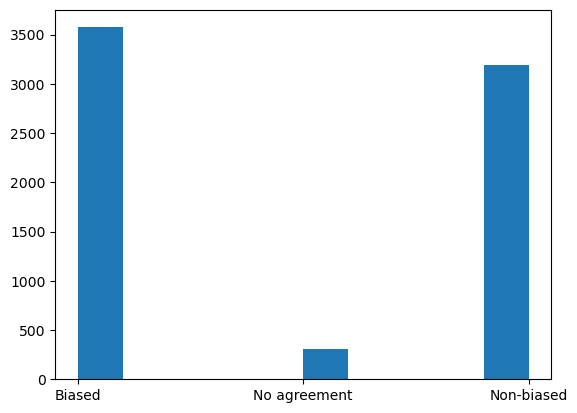

In [44]:
plt.hist(babe['label_bias'])
plt.plot()

In [45]:
babe.isna().sum()

text                0
news_link          79
outlet              0
topic               0
type             1000
group_id         5374
num_sent         5374
label_bias          0
label_opinion       0
article          5479
biased_words        0
dtype: int64

In [46]:
babe.size

77814

lower casing every words in the text

In [47]:
babe = babe.applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\ritik\AppData\Local\Temp\ipykernel_31032\665646948.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  babe = babe.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Removing Non words

In [48]:
babe['text'] = babe['text'].replace(to_replace=r'[^\w\s]', value='', regex=True)


In [49]:
babe_notnull = babe.dropna()

In [50]:
babe_notnull.isna().sum()


text             0
news_link        0
outlet           0
topic            0
type             0
group_id         0
num_sent         0
label_bias       0
label_opinion    0
article          0
biased_words     0
dtype: int64

In [51]:
babe_notnull.size

17336

In [52]:
babe_notnull.drop(columns=['type'])

text  \
0     youtube is making clear there will be no birth...   
1     so while there may be a humanitarian crisis dr...   
2     looking around the united states there is neve...   
3     the republican president assumed he was helpin...   
4     the explosion of the hispanic population has l...   
...                                                 ...   
1694  sen bernie sanders ivt went after pete buttigi...   
1695  last week barstool sports founder dave portnoy...   
1696  coincidentally many republican lawmakers who v...   
1698  as a selfdescribed democratic socialist sen be...   
1699  during the segment colbert also bemoaned the f...   

                                              news_link      outlet  \
0     https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1     https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2     https://thefederalist.com/2020/03/11/woman-who...  federalist   
3     http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4     https://www.breitbart.com/politics/2015/02/26/...   breitbart   
...                                                 ...         ...   
1694  https://www.nbcnews.com/politics/meet-the-pres...       msnbc   
1695  https://thefederalist.com/2020/05/18/how-you-c...  federalist   
1696  https://www.alternet.org/2020/01/follow-the-mo...    alternet   
1698  https://www.foxnews.com/politics/how-did-berni...    fox-news   
1699  https://www.breitbart.com/entertainment/2018/1...   breitbart   

                  topic  group_id  num_sent  label_bias  \
0        elections-2020       1.0       1.0      biased   
1           immigration       1.0       1.0      biased   
2              abortion       1.0       1.0      biased   
3           environment       1.0       1.0      biased   
4          student-debt       1.0       1.0      biased   
...                 ...       ...       ...         ...   
1694       middle-class      85.0       1.0  non-biased   
1695        coronavirus      85.0       1.0  non-biased   
1696       middle-class      85.0       1.0  non-biased   
1698       middle-class      85.0       1.0  non-biased   
1699  white-nationalism      85.0       1.0  non-biased   

                              label_opinion  \
0     somewhat factual but also opinionated   
1                expresses writer’s opinion   
2     somewhat factual but also opinionated   
3                expresses writer’s opinion   
4                              no agreement   
...                                     ...   
1694                       entirely factual   
1695  somewhat factual but also opinionated   
1696  somewhat factual but also opinionated   
1698                       entirely factual   
1699                           no agreement   

                                                article  \
0     youtube says no ‘deepfakes’ or ‘birther’ video...   
1     speaking to the country for the first time fro...   
2     the left has a thing for taking babies hostage...   
3     in barack obama’s first term, the administrati...   
4     republicans should stop fighting amnesty, pres...   
...                                                 ...   
1694  see new posts\nsanders hits buttigieg for bill...   
1695  not everyone seething about the ongoing abuses...   
1696  it’s long been obvious that republican senator...   
1698  as a self-described democratic socialist, sen....   
1699  cbs late show host stephen colbert claimed on ...   

                                           biased_words  
0                             ['belated', 'birtherism']  
1                                            ['crisis']  
2     ['killing', 'never', 'developing', 'humans', '...  
3                       ['rejects', 'happy', 'assumed']  
4                                         ['explosion']  
...                                                 ...  
1694                                  ['after', 'went']  
1695                           ['ranted', 

In [53]:
babe_notnull['label_bias'] = babe_notnull['label_bias'].replace({'no agreement': 'biased'})

C:\Users\ritik\AppData\Local\Temp\ipykernel_31032\996552929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  babe_notnull['label_bias'] = babe_notnull['label_bias'].replace({'no agreement': 'biased'})


In [54]:
babe_notnull['label_bias'].unique()

array(['biased', 'non-biased'], dtype=object)

[]

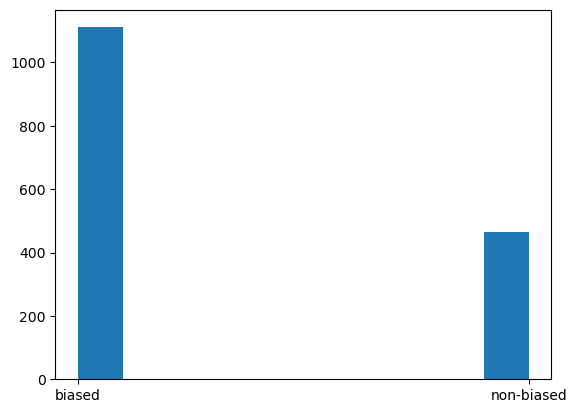

In [55]:
plt.hist(babe_notnull['label_bias'])
plt.plot()

In [56]:
babe_notnull['label_bias'].value_counts()

label_bias
biased        1111
non-biased     465
Name: count, dtype: int64

In [57]:
babe_notnull.shape[0]

1576

In [58]:
(babe_notnull['label_bias'] == 'Biased').sum()/babe_notnull.shape[0] *100

0.0

In [59]:
(babe_notnull['label_bias'] == 'Non-biased').sum()/babe_notnull.shape[0] *100

0.0

So we see a class imbalance here 
Biased -> 70.5
Non-Biased -> 29.5

In [60]:
babe_notnull.head()

text  \
0  youtube is making clear there will be no birth...   
1  so while there may be a humanitarian crisis dr...   
2  looking around the united states there is neve...   
3  the republican president assumed he was helpin...   
4  the explosion of the hispanic population has l...   

                                           news_link      outlet  \
0  https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1  https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2  https://thefederalist.com/2020/03/11/woman-who...  federalist   
3  http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4  https://www.breitbart.com/politics/2015/02/26/...   breitbart   

            topic    type  group_id  num_sent label_bias  \
0  elections-2020  center       1.0       1.0     biased   
1     immigration    left       1.0       1.0     biased   
2        abortion   right       1.0       1.0     biased   
3     environment    left       1.0       1.0     biased   
4    student-debt   right       1.0       1.0     biased   

                           label_opinion  \
0  somewhat factual but also opinionated   
1             expresses writer’s opinion   
2  somewhat factual but also opinionated   
3             expresses writer’s opinion   
4                           no agreement   

                                             article  \
0  youtube says no ‘deepfakes’ or ‘birther’ video...   
1  speaking to the country for the first time fro...   
2  the left has a thing for taking babies hostage...   
3  in barack obama’s first term, the administrati...   
4  republicans should stop fighting amnesty, pres...   

                                        biased_words  
0                          ['belated', 'birtherism']  
1                                         ['crisis']  
2  ['killing', 'never', 'developing', 'humans', '...  
3                    ['rejects', 'happy', 'assumed']  
4                                      ['explosion']

In [61]:
babe_notnull['topic'].unique()

array(['elections-2020', 'immigration', 'abortion', 'environment',
       'student-debt', 'vaccines', 'sport', 'white-nationalism',
       'coronavirus', 'trump-presidency',
       'international-politics-and-world-news', 'gun-control',
       'middle-class', 'gender'], dtype=object)

[]

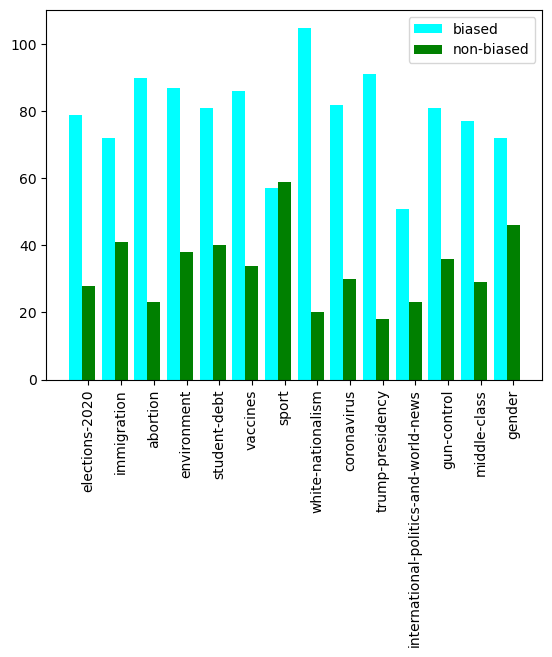

In [62]:
x= np.arange(14)
topic=babe_notnull['topic'].unique()
width=0.4
for i in x:
    plt.bar(i-0.4, (babe_notnull[babe_notnull['topic']==topic[i]]['label_bias'] == 'biased').sum(), width, color='cyan')
    plt.bar(i, (babe_notnull[babe_notnull['topic']==topic[i]]['label_bias'] == 'non-biased').sum(), width, color='green')
plt.xticks(x,topic,rotation='vertical')
plt.legend(babe_notnull['label_bias'].unique())
plt.plot()

In [63]:
Biased = ' '.join(list(babe_notnull.text[babe_notnull.label_bias == 'biased']))
Non_biased = ' '.join(list(babe_notnull.text[babe_notnull.label_bias == 'non-biased']))


In [64]:
Biased

'youtube is making clear there will be no birtherism on its platform during this years us presidential election  a belated response to a type of conspiracy theory more prevalent in the 2012 race so while there may be a humanitarian crisis driving more vulnerable people to seek asylum in the united states there is no security crisis looking around the united states there is never enough welfare for the left to stop killing developing humans in uterosolidly democratic states lead the nation in abortion rates  the republican president assumed he was helping the industry at the expense of the environment  a tradeoff trump was happy to make since he rejects climate science anyway  the explosion of the hispanic population has longterm job prospect consequences as well both legal and illegal aliens will occupy 75 percent of new american jobs in as little as five years the antivaccine movement made headlines last spring when widespread distrust of the pharmaceutical industry and the belief tha

In [65]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [66]:
from wordcloud import WordCloud

def wordcloud(text, title):
    wordcloud = WordCloud(
        width = 1600,
        height = 1000,
        background_color = "black",
        stopwords = stop_words,
        min_font_size = 10
    ).generate(text)

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title("Word Cloud for " + title + " Articles\n", fontsize = 20)
    plt.axis("off")
    plt.show()

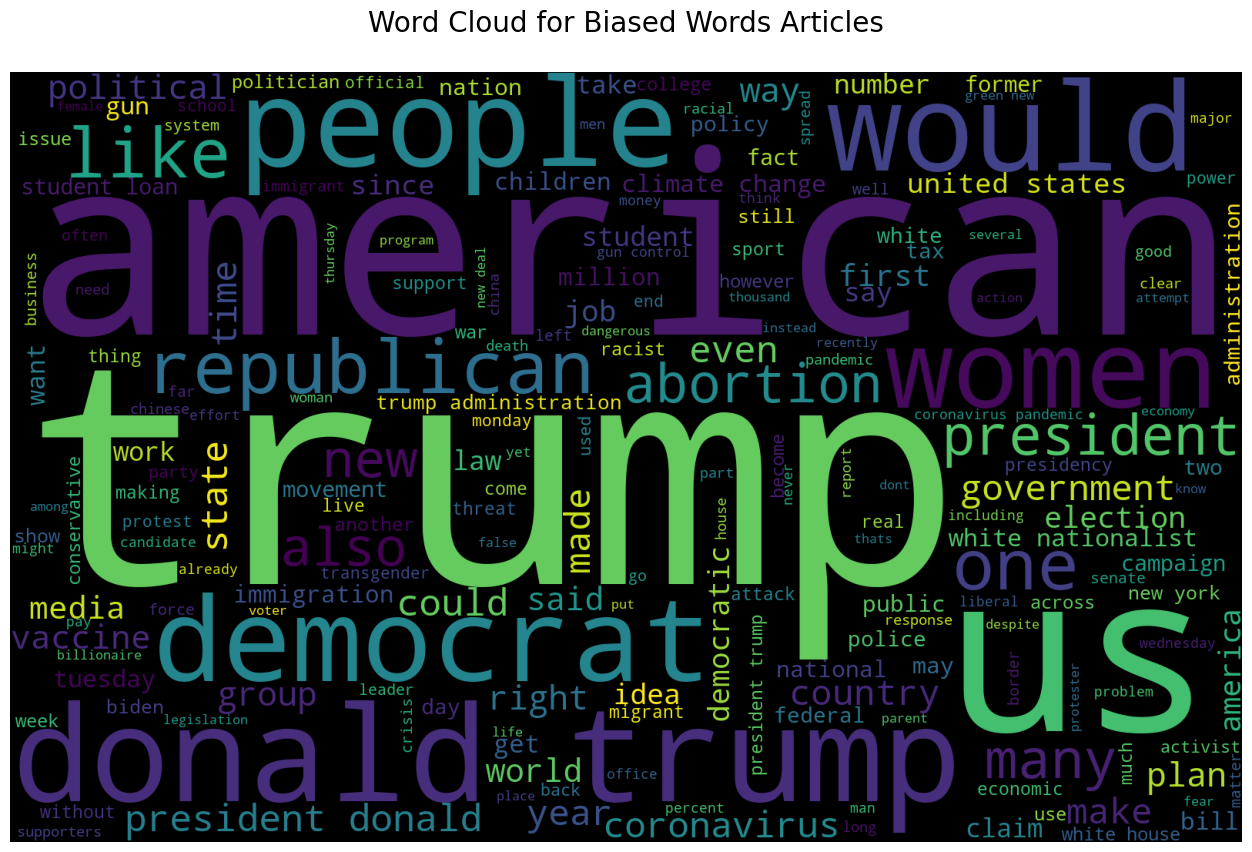

In [67]:
wordcloud(Biased, "Biased Words")

In [68]:
#This might be because the number of data  related to white-nationalism lets check

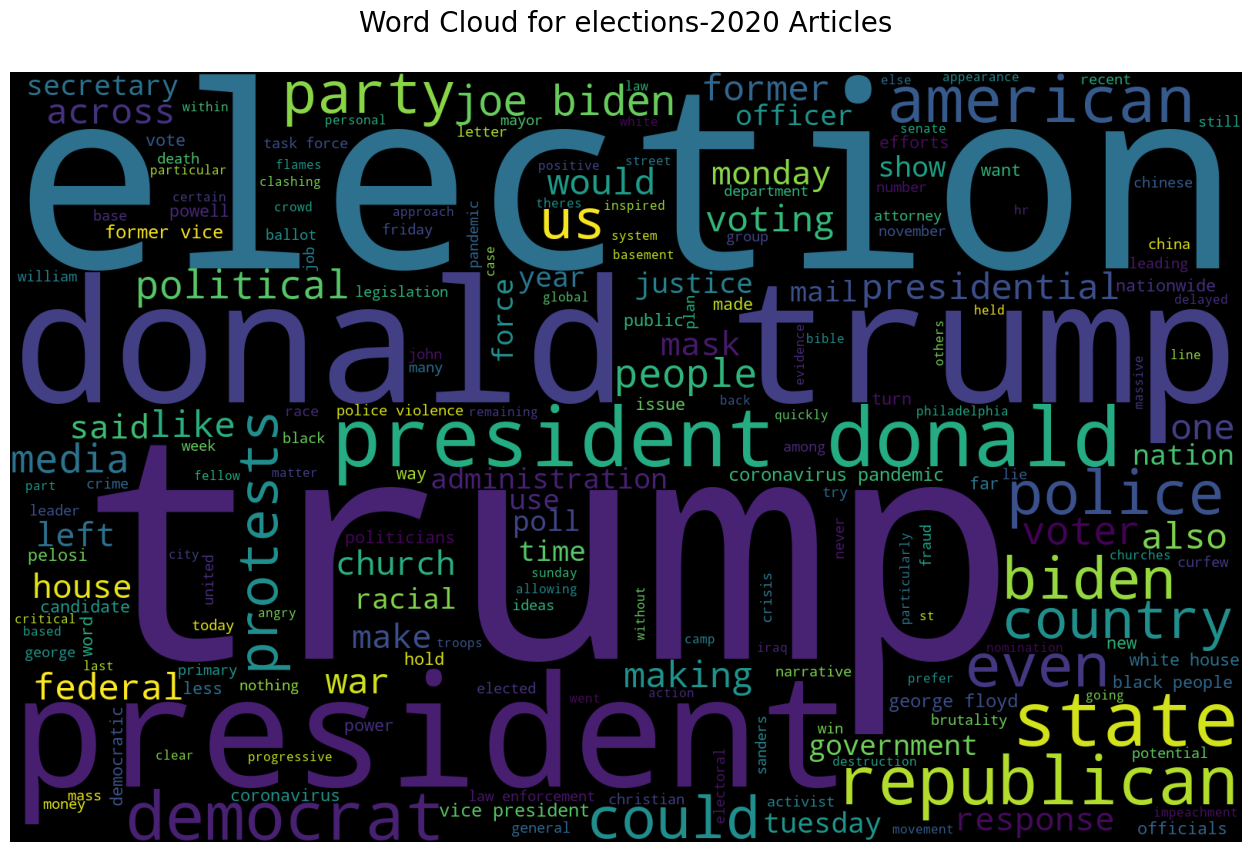

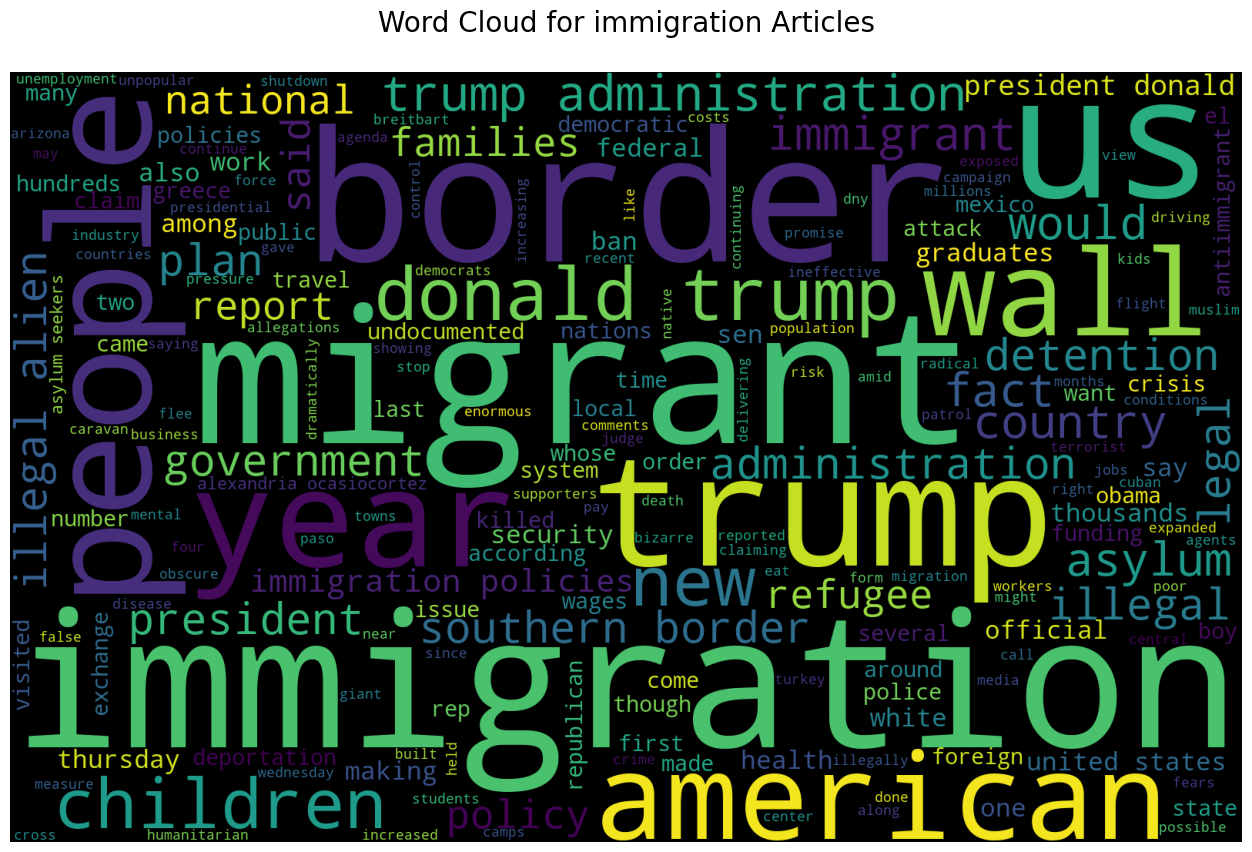

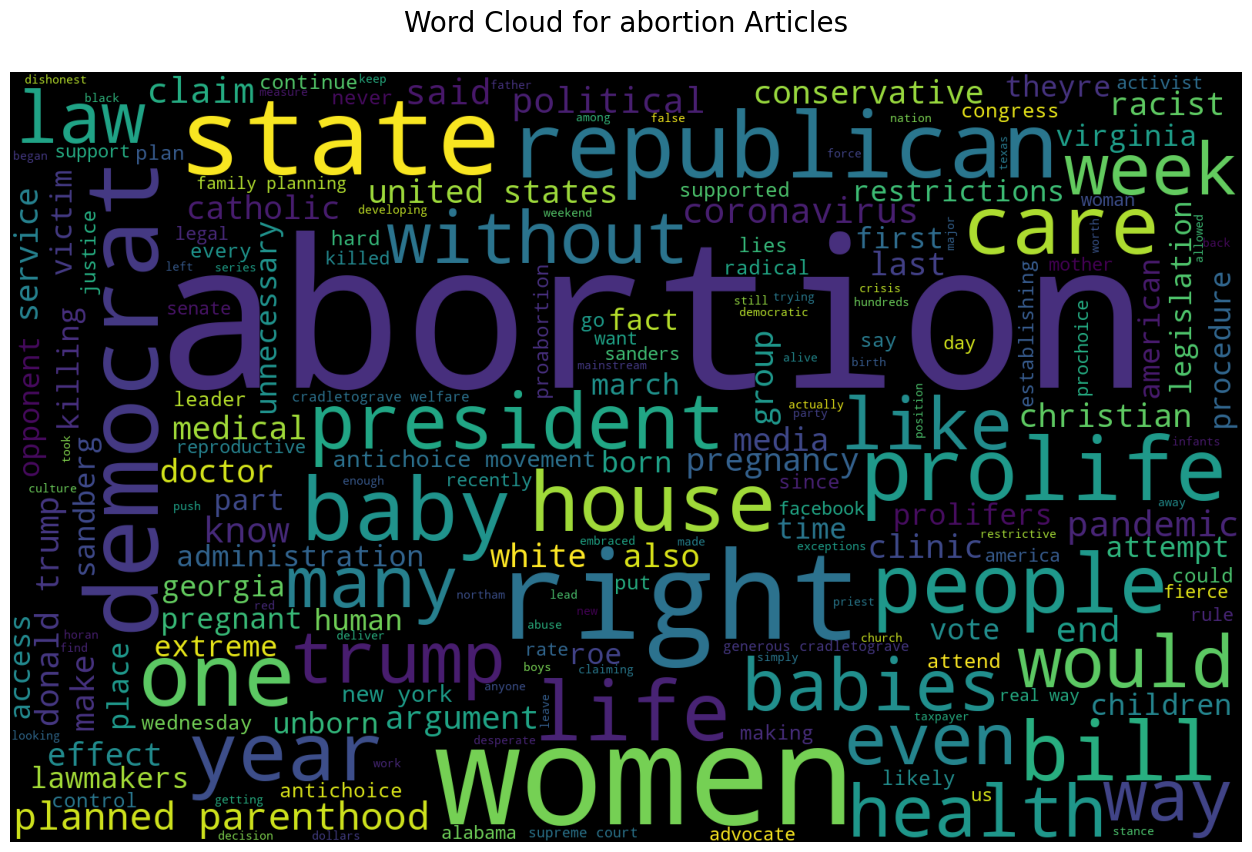

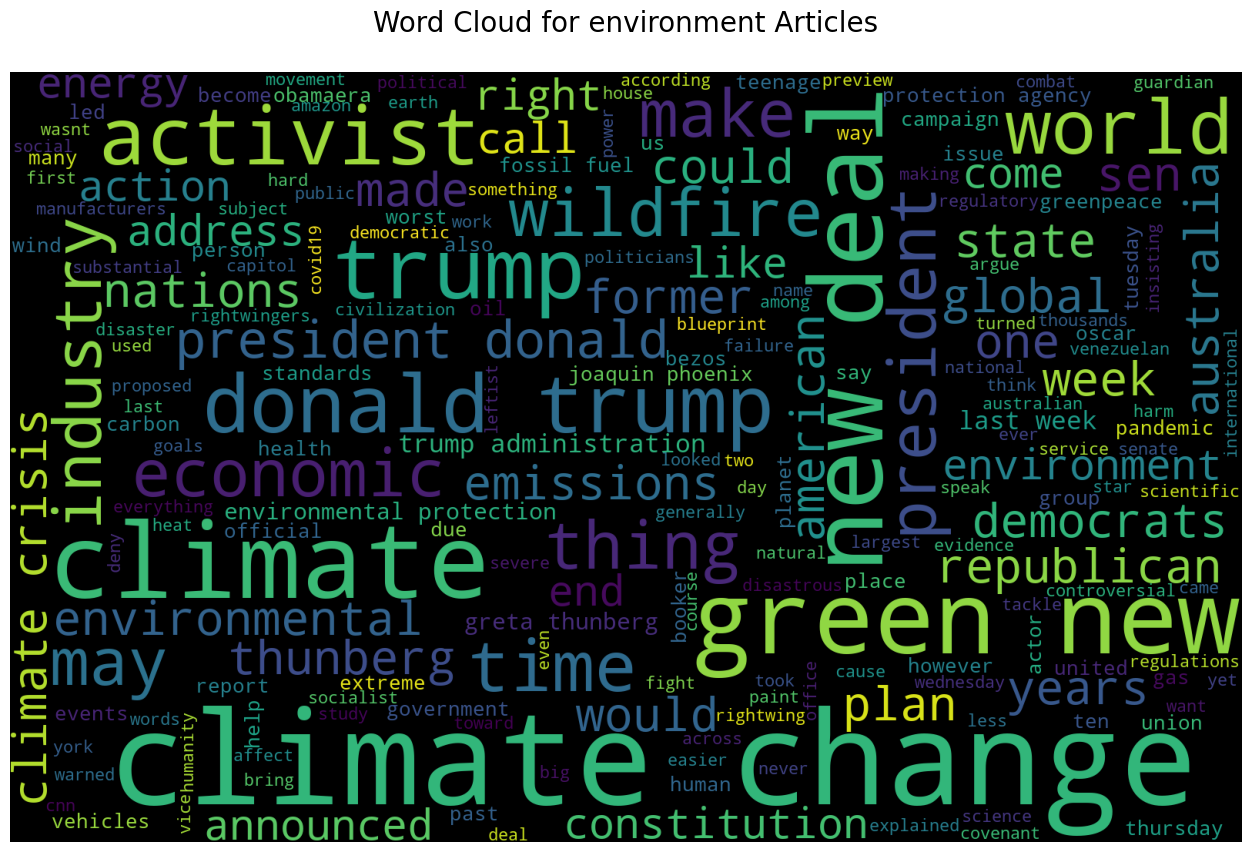

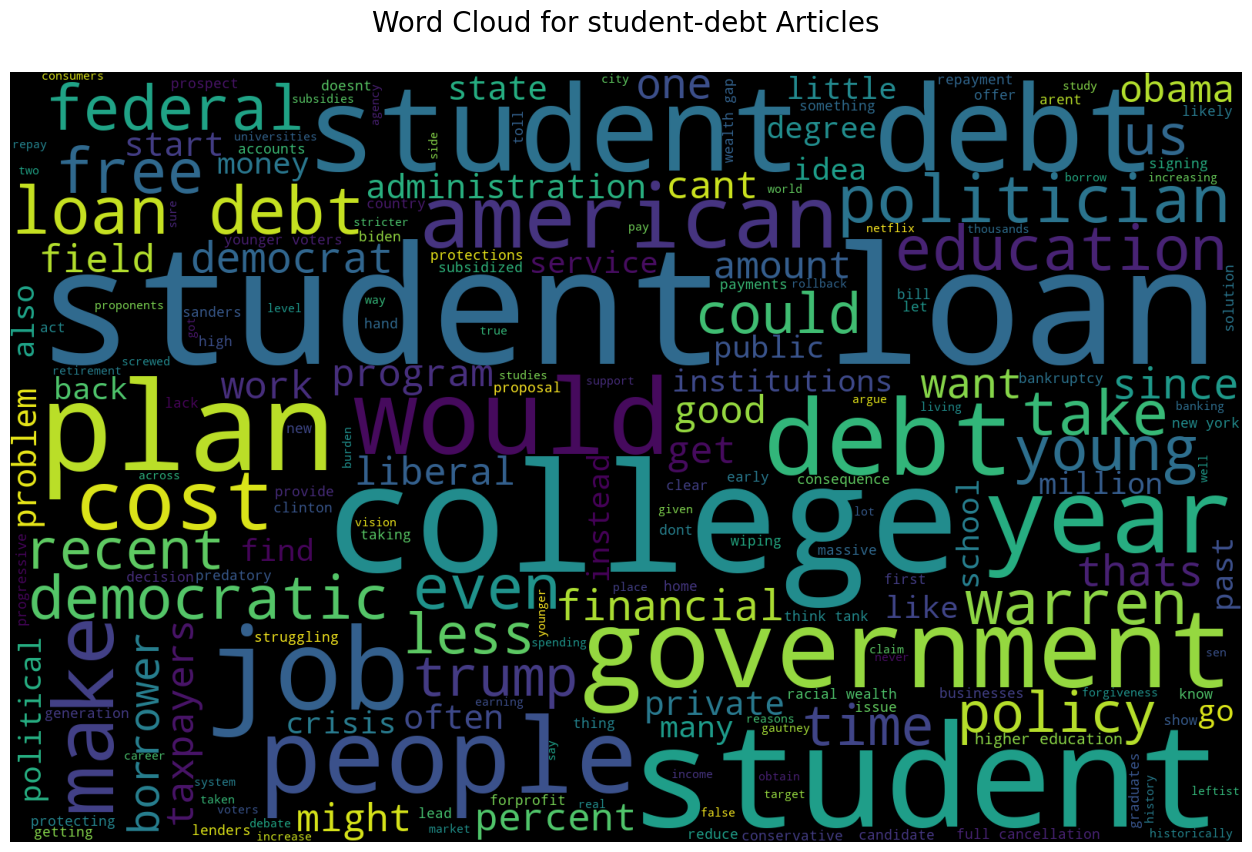

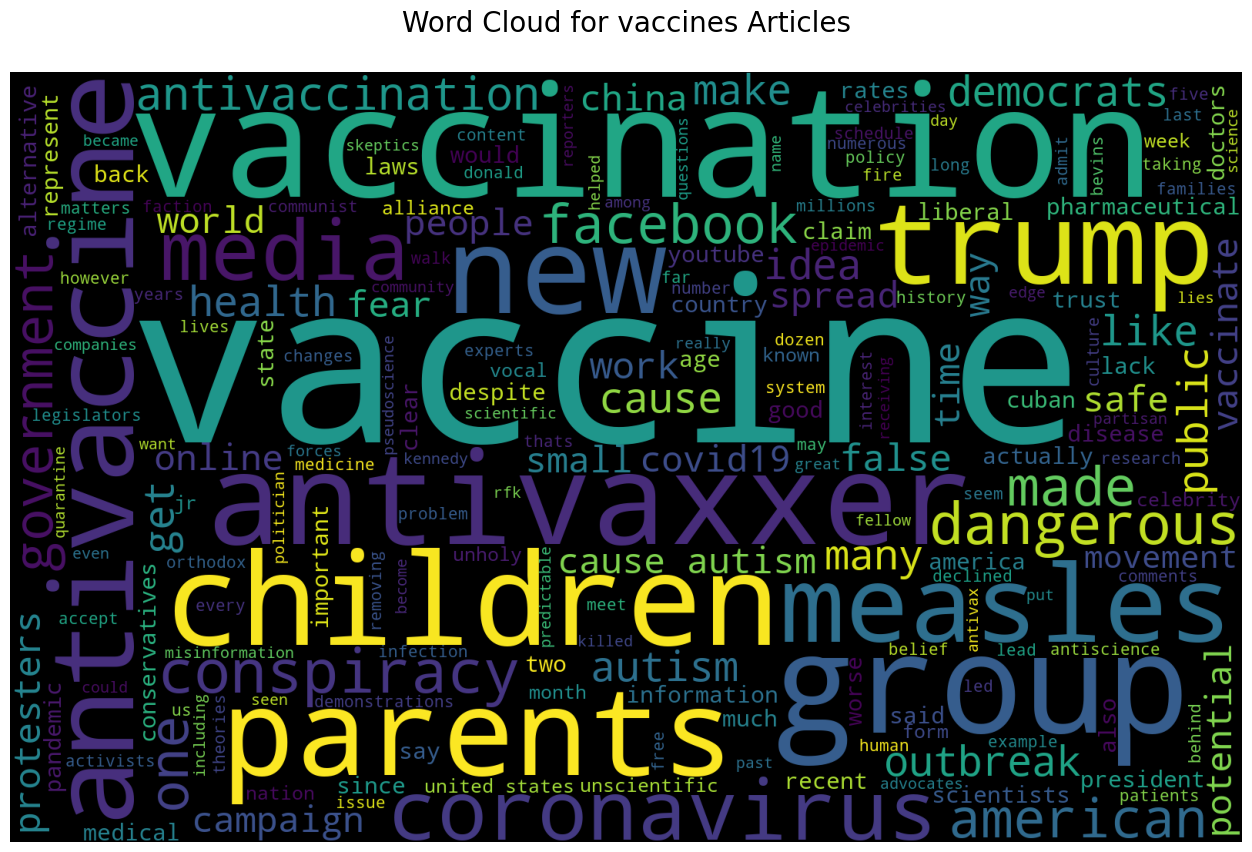

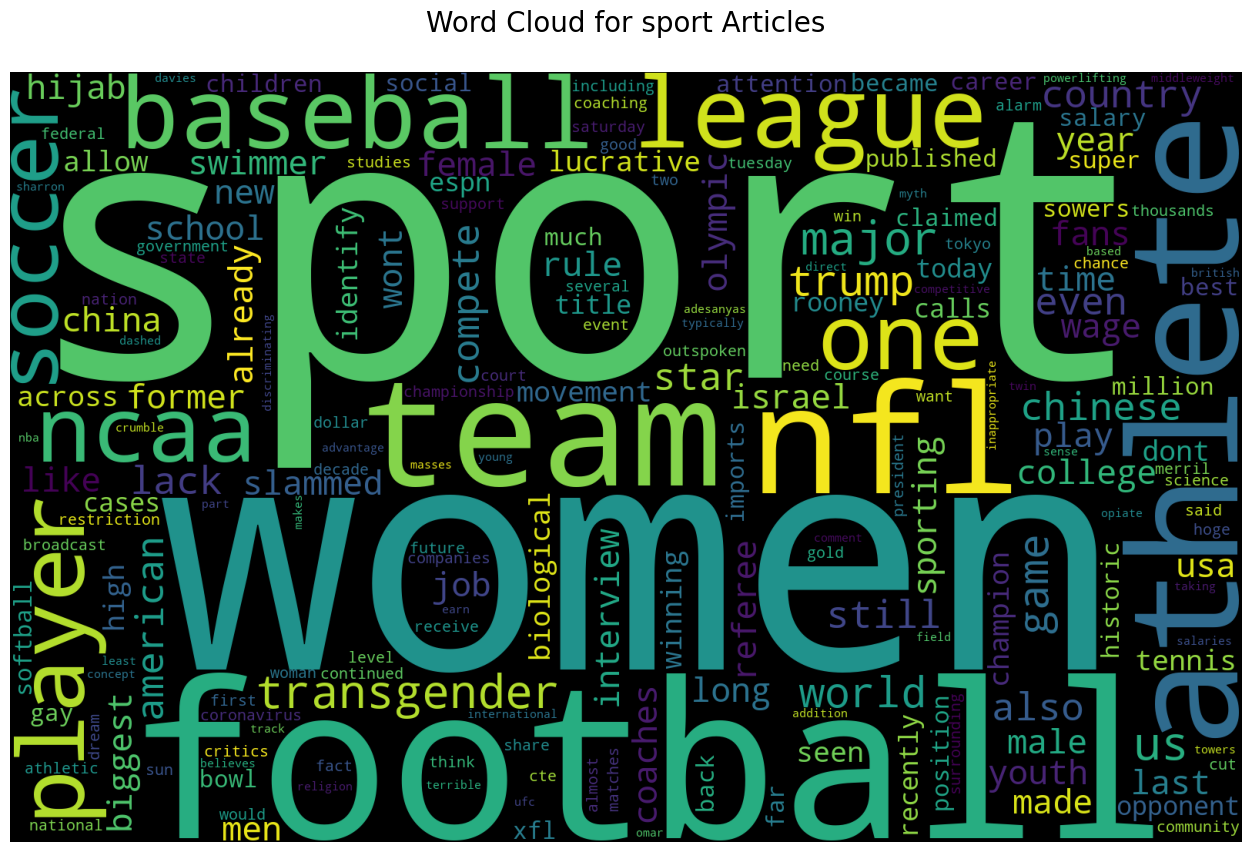

In [ ]:
#Lets check every category wish of Biased articles
for i in babe_notnull['topic'].unique():
    x=babe_notnull[babe_notnull['topic'] == i]
    j = ' '.join(list(x.text[x.label_bias == 'biased']))
    wordcloud(j, i)
    j=pd.Series([])